# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [2]:
df = pd.read_csv('/datasets/insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [3]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [4]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
3455,1,25.0,46100.0,1,0
1418,1,28.0,59900.0,0,0
1999,1,34.0,42300.0,3,0
1866,1,47.0,37700.0,1,1
262,1,34.0,46800.0,2,0
2157,0,24.0,20500.0,0,0
2050,1,28.0,44000.0,2,0
2728,0,20.0,51400.0,3,0
4867,1,24.0,46700.0,2,0
4295,0,47.0,38900.0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [ ]:
df['age'] = df['age'].astype('int32')

In [7]:
df.info()# check to see that the conversion was successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int32  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 175.9 KB


In [ ]:
df.describe()# now have a look at the data's descriptive statistics. 


,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


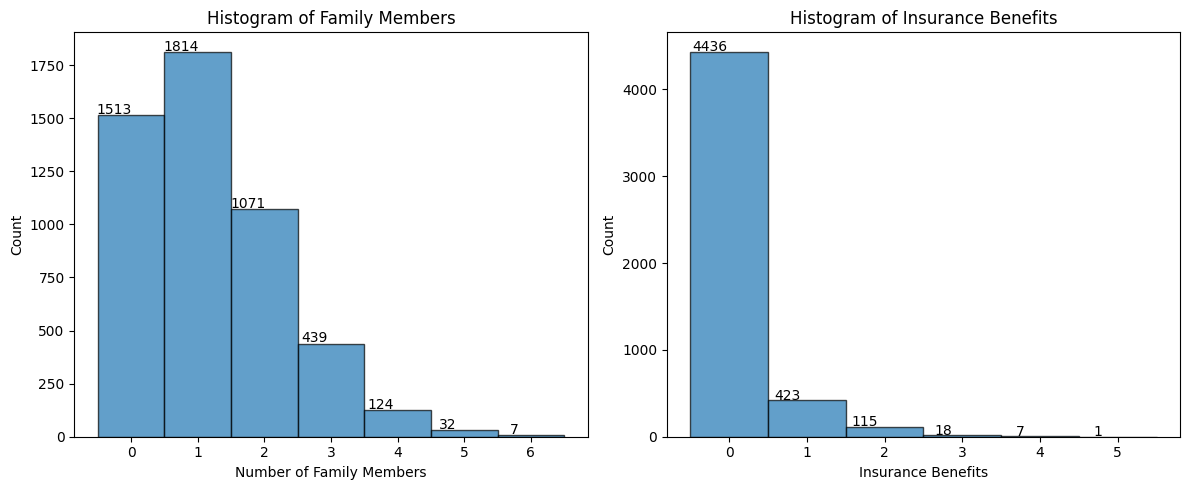

In [9]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
counts, bins, patches = plt.hist(df['family_members'], bins=np.arange(df['family_members'].max() + 2) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(df['family_members'].max() + 1))
plt.title('Histogram of Family Members')
plt.xlabel('Number of Family Members')
plt.ylabel('Count')

for count, bin_edge in zip(counts, bins[:-1]):
    plt.text(bin_edge + 0.25, count + 5, str(int(count)), ha='center', fontsize=10)

plt.subplot(1, 2, 2)
counts, bins, patches = plt.hist(df['insurance_benefits'], bins=np.arange(df['insurance_benefits'].max() + 2) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(df['insurance_benefits'].max() + 1))
plt.title('Histogram of Insurance Benefits')
plt.xlabel('Insurance Benefits')
plt.ylabel('Count')

for count, bin_edge in zip(counts, bins[:-1]):
    plt.text(bin_edge + 0.25, count + 5, str(int(count)), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

#The data looks okay some points to take notice are family members and insurance benefits are heavily positively skewed given that most poeople do not have any insurance benefits and most people only have 1 2 or maybe 3 siblings. Also there is an outlier of only 1 person who has had 5 insurance claims.  Since it is only 1 out of 5,000 I am going to remove it from the data.

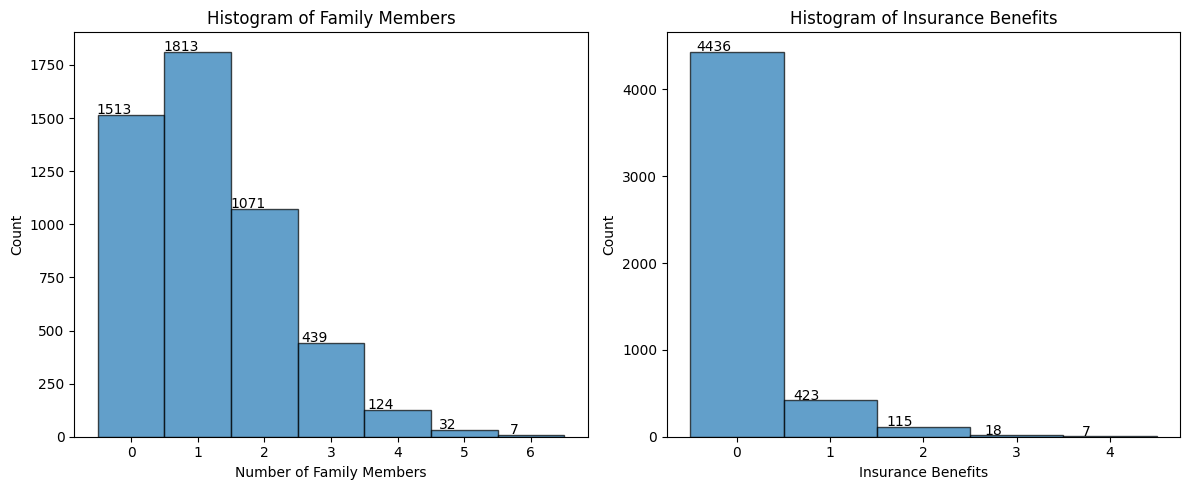

,gender,age,income,family_members,insurance_benefits
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,0.498900,30.945989,39916.403281,1.194239,0.147029
std,0.500049,8.427900,9901.073451,1.091492,0.458116
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,62.000000,79000.000000,6.000000,4.000000


In [10]:
df = df[df['insurance_benefits'] != 5]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
counts, bins, patches = plt.hist(df['family_members'], bins=np.arange(df['family_members'].max() + 2) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(df['family_members'].max() + 1))
plt.title('Histogram of Family Members')
plt.xlabel('Number of Family Members')
plt.ylabel('Count')

for count, bin_edge in zip(counts, bins[:-1]):
    plt.text(bin_edge + 0.25, count + 5, str(int(count)), ha='center', fontsize=10)

plt.subplot(1, 2, 2)
counts, bins, patches = plt.hist(df['insurance_benefits'], bins=np.arange(df['insurance_benefits'].max() + 2) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(df['insurance_benefits'].max() + 1))
plt.title('Histogram of Insurance Benefits')
plt.xlabel('Insurance Benefits')
plt.ylabel('Count')

for count, bin_edge in zip(counts, bins[:-1]):
    plt.text(bin_edge + 0.25, count + 5, str(int(count)), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

df.describe()

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

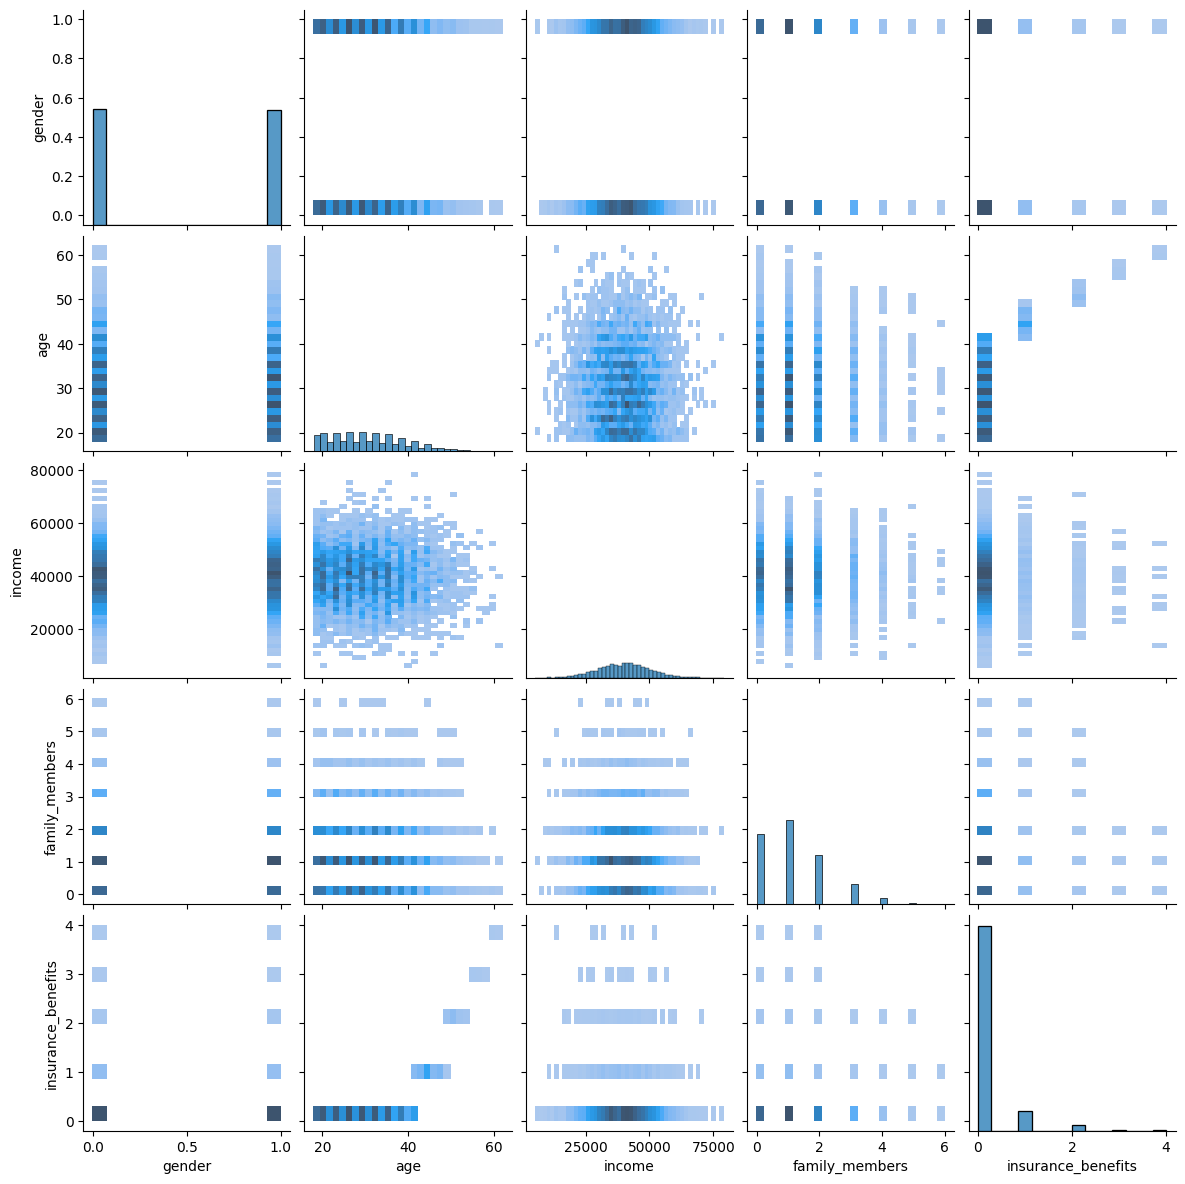

In [11]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [12]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [13]:
from sklearn.neighbors import NearestNeighbors

def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """
    df = df.copy().reset_index(drop=True)
    if n >= df.shape[0]:
        raise ValueError(f"Row index {n} is out of range (max {df.shape[0]-1})")

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df[feature_names])# <your code here> 
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

df_res = get_knn(df, n=100, k=10, metric="euclidean")
print(df_res.isnull().sum())

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
distance              0
dtype: int64


Scaling the data.

In [14]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [15]:
df_scaled.sample(5)
print(df_scaled.isnull().sum())

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64


Now, let's get similar records for a given one for every combination

In [16]:
from sklearn.neighbors import NearestNeighbors

scaling_options = [True, False]
distance_metrics = ['euclidean', 'manhattan']

def scale_data(df, scale):
    if scale:
        transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())
        df_scaled = df.copy()
        df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
        return df_scaled
    return df

for scale in scaling_options:
    for metric in distance_metrics:
        print(f"Configuration: Scale={scale}, Metric={metric}")
        
        df_transformed = scale_data(df, scale)
        
        n = 0
        k = 5
        similar_records = get_knn(df_transformed, n, k, metric)
        
        print(similar_records)

Configuration: Scale=True, Metric=euclidean
      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.661290  0.627848        0.166667                   0  0.000000
2688     1.0  0.661290  0.634177        0.166667                   0  0.006329
133      1.0  0.645161  0.636709        0.166667                   0  0.018403
4868     1.0  0.677419  0.637975        0.166667                   1  0.019045
3274     1.0  0.677419  0.651899        0.166667                   1  0.028958
Configuration: Scale=True, Metric=manhattan
      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.661290  0.627848        0.166667                   0  0.000000
2688     1.0  0.661290  0.634177        0.166667                   0  0.006329
133      1.0  0.645161  0.636709        0.166667                   0  0.024990
4868     1.0  0.677419  0.637975        0.166667                   1  0.026256
3364     1.0  0.661290  0.596203        0.1

Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Yes, judging from adjusting the n position you will see that data being scaled drastically changes the distance measurement in the kNN algorithm.  That makes sense though since you are scaling every variable down to a value between 0 and 1 you will get a lower distance because the sum of the distances for all the variables will be from variables betweeen 0 and 1.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

For the Manhattan results the distances are slightly higher for both non-scaled and scaled.  That due to the Manhattan distance not being a straight line and more like when you are walking street block by street block zig zagging your way to the location.  When you do that you are going to be traveling a further distance overall unless it was a straight line to begin with.

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [17]:
# calculate the target

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)
df_scaled['insurance_benefits_received'] = (df_scaled['insurance_benefits']).astype(int) > 0#<your code here>

In [18]:
# check for the class imbalance with value_counts()
gender_counts = df.value_counts('gender')
family_counts = df.value_counts('family_members')
insurance_counts = df.value_counts('insurance_benefits')

print(gender_counts)
print(family_counts)
print(insurance_counts)# <your code here>
print(df.head(10))

gender
0    2505
1    2494
dtype: int64
family_members
1    1813
0    1513
2    1071
3     439
4     124
5      32
6       7
dtype: int64
insurance_benefits
0    4436
1     423
2     115
3      18
4       7
dtype: int64
   gender  age   income  family_members  insurance_benefits  \
0       1   41  49600.0               1                   0   
1       0   46  38000.0               1                   1   
2       0   29  21000.0               0                   0   
3       0   21  41700.0               2                   0   
4       1   28  26100.0               0                   0   
5       1   43  41000.0               2                   1   
6       1   39  39700.0               2                   0   
7       1   25  38600.0               4                   0   
8       1   36  49700.0               1                   0   
9       1   32  51700.0               1                   0   

   insurance_benefits_received  
0                            0  
1                   

In [19]:
X = df.drop(columns=["insurance_benefits_received", "insurance_benefits"])
y = df["insurance_benefits_received"].astype(int)


X_scaled = df_scaled.drop(columns=["insurance_benefits_received", "insurance_benefits"])
y_scaled = df_scaled['insurance_benefits_received'].astype(int)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=12345)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier

knn_results = {}
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    knn_results[k] = f1

knn_scaled_results = {}
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_scaled)
    y_pred_scaled = knn.predict(X_test_scaled)
    f1_scaled = f1_score(y_test_scaled, y_pred_scaled)
    knn_scaled_results[k] = f1_scaled

dummy_results = {}
for prob in [0, 0.5, 1]:
    dummy = DummyClassifier(strategy="prior", constant=prob)
    dummy.fit(X_train, y_train)
    y_pred_dummy = dummy.predict(X_test)
    f1_dummy = f1_score(y_test, y_pred_dummy)
    dummy_results[prob] = f1_dummy


print("KNN Results:", knn_results)
print("KNN Scaled Results:", knn_scaled_results)
print("Dummy Model Results:", dummy_results)

KNN Results: {1: 0.6122448979591838, 2: 0.33777777777777773, 3: 0.3781512605042017, 4: 0.17821782178217824, 5: 0.19718309859154928, 6: 0.0634920634920635, 7: 0.0634920634920635, 8: 0.03296703296703297, 9: 0.03278688524590164, 10: 0.022099447513812154}
KNN Scaled Results: {1: 0.9507246376811594, 2: 0.9085365853658537, 3: 0.9352941176470588, 4: 0.8950617283950617, 5: 0.9069069069069069, 6: 0.877742946708464, 7: 0.9024390243902439, 8: 0.8598726114649682, 9: 0.8757763975155279, 10: 0.8535031847133759}
Dummy Model Results: {0: 0.0, 0.5: 0.0, 1: 0.0}


#The precode already in here was not working for me in line 42 so I built my own KNN testing.

#According to our KNN classifier data for both the scaled and unscaled data the scaled data test far better.  The normal datas best KNN model had an F1 score of 0.61 with a K value of 1 and a worst score of 0.022 for K value of 10.  The average scores out of the 10 K options for the normal data was far below the average score for the scaled data.   The scaled data had an average F1 score that was floating around 0.9.  The F1 score for K value of 1 was 0.951 while the lowest F1 score for the K value of 10 was 0.853.  SCaling the data drastically benefited the model and helped with making predicitions.  Also the higher we made the K score the more the F1 score decreased.  To low of a K1 score and lead to overfitting but to high of a K1 score can smooth predictions and reduce noise but may lose some detail.

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [22]:
import math
import sklearn.metrics

class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y = y.reshape(-1, 1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y# <your code here>

    def predict(self, X):
        
        # adding the unities
        X2 = np.append(np.ones((len(X), 1)), X, axis=1)# <your code here>
        y_pred = X2 @ self.weights# <your code here>
        
        return y_pred

In [23]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [24]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[[-9.39589935e-01]
 [ 3.49408689e-02]
 [ 1.40129187e-02]
 [ 1.48982444e-07]
 [-1.00527394e-02]]
RMSE: 0.35
R2: 0.66


In [25]:
import math
import sklearn.metrics

class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X_scaled, y_scaled):
        
        # adding the unities
        X2_scaled = np.append(np.ones([len(X_scaled), 1]), X_scaled, axis=1)
        y_scaled = y_scaled.reshape(-1, 1)
        self.weights_scaled = np.linalg.inv(X2_scaled.T @ X2_scaled) @ X2_scaled.T @ y_scaled# <your code here>

    def predict(self, X_scaled):
        
        # adding the unities
        X2_scaled = np.append(np.ones((len(X_scaled), 1)), X_scaled, axis=1)# <your code here>
        y_pred_scaled = X2_scaled @ self.weights_scaled# <your code here>
        
        return y_pred_scaled

In [26]:
def eval_regressor(y_true_scaled, y_pred_scaled):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true_scaled, y_pred_scaled))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true_scaled, y_pred_scaled))
    print(f'R2: {r2_score:.2f}')    

In [27]:
X_scaled = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y_scaled = df['insurance_benefits'].to_numpy()

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=12345)

lr_scaled = MyLinearRegression()

lr_scaled.fit(X_train_scaled, y_train_scaled)
print(lr_scaled.weights)

y_test_pred_scaled = lr_scaled.predict(X_test_scaled)
eval_regressor(y_test_scaled, y_test_pred_scaled)

None
RMSE: 0.35
R2: 0.66


#Comparing RMSE for the original data and the scaled data shows no difference between the two.  Since the scaling just adjusts the numbers 0 to 1 there will still be differences in the data but it makes sense that the RMSE is the same since distances will just be decreased by equal proportions for scaling.

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [30]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [31]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [32]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [37]:
def is_invertible(matrix):
    try:
        determinant = np.linalg.det(matrix)
        return determinant != 0
    except np.linalg.LinAlgError:
        return False
    
print(f"P is invertible: {is_invertible(P)}")

P is invertible: True


Can you guess the customers' ages or income after the transformation?

#No you cannot after applying obfuscation.  The transformed data looks completely different than the original data.  The relationship between the variables has changed making it extremely difficult to extract individual values.

In [38]:
X_obfuscated = X @ P 

print("Original Data (First 5 Rows):")
print(pd.DataFrame(X, columns=personal_info_column_list).head())

print("\nObfuscated Data (First 5 Rows):")
print(pd.DataFrame(X_obfuscated, columns=personal_info_column_list).head())

Original Data (First 5 Rows):
   gender   age   income  family_members
0     1.0  41.0  49600.0             1.0
1     0.0  46.0  38000.0             1.0
2     0.0  29.0  21000.0             0.0
3     0.0  21.0  41700.0             2.0
4     1.0  28.0  26100.0             0.0

Obfuscated Data (First 5 Rows):
        gender           age        income  family_members
0  6359.715273  22380.404676  18424.090742    46000.696690
1  4873.294065  17160.367030  14125.780761    35253.455773
2  2693.117429   9486.397744   7808.831560    19484.860631
3  5345.603937  18803.227203  15479.148373    38663.061863
4  3347.176735  11782.829283   9699.998942    24211.273378


Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [39]:
P_inv = np.linalg.inv(P)

X_recovered = X_obfuscated @ P_inv

print("\nRecovered Data (First 5 Rows):")
print(pd.DataFrame(X_recovered, columns=personal_info_column_list).head())


Recovered Data (First 5 Rows):
         gender   age   income  family_members
0  1.000000e+00  41.0  49600.0    1.000000e+00
1 -4.473636e-12  46.0  38000.0    1.000000e+00
2 -2.515869e-12  29.0  21000.0    9.524523e-13
3 -4.844982e-12  21.0  41700.0    2.000000e+00
4  1.000000e+00  28.0  26100.0   -1.019907e-13


Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [40]:
df_obfuscated = pd.DataFrame(X_obfuscated, columns=personal_info_column_list)
df_recovered = pd.DataFrame(X_recovered, columns=personal_info_column_list)

print("\nOriginal Data (First 5 Rows):")
print(pd.DataFrame(X, columns=personal_info_column_list).head())

print("\nObfuscated Data (First 5 Rows):")
print(df_obfuscated.head())

print("\nRecovered Data (First 5 Rows):")
print(df_recovered.head())


Original Data (First 5 Rows):
   gender   age   income  family_members
0     1.0  41.0  49600.0             1.0
1     0.0  46.0  38000.0             1.0
2     0.0  29.0  21000.0             0.0
3     0.0  21.0  41700.0             2.0
4     1.0  28.0  26100.0             0.0

Obfuscated Data (First 5 Rows):
        gender           age        income  family_members
0  6359.715273  22380.404676  18424.090742    46000.696690
1  4873.294065  17160.367030  14125.780761    35253.455773
2  2693.117429   9486.397744   7808.831560    19484.860631
3  5345.603937  18803.227203  15479.148373    38663.061863
4  3347.176735  11782.829283   9699.998942    24211.273378

Recovered Data (First 5 Rows):
         gender   age   income  family_members
0  1.000000e+00  41.0  49600.0    1.000000e+00
1 -4.473636e-12  46.0  38000.0    1.000000e+00
2 -2.515869e-12  29.0  21000.0    9.524523e-13
3 -4.844982e-12  21.0  41700.0    2.000000e+00
4  1.000000e+00  28.0  26100.0   -1.019907e-13


You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

#I believe the reason some of the values are not the same is because the values take on a whole number and the obfuscation get the numbers close to the whole number but still has an extremely large amount of decimals.  For example gender is either 1 or 0, it looks like in the recovered data it either gives us a value of 1.0000000000001342 (or some combination or decimals with a large amount of 0s or a value extremely close to 0 but not precisely zero.

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

wp is just a transformed version of w, meaning they are directly related through $ P^{-1} $.  The predicted values remain unchanged.  Since predictions are indentical the RMSE will also be identical.  T

**Analytical proof**

Normal equation:
$$ w = (X^T X)^{-1} X^T y $$
If we obfuscate X by multiplying it with an invertible matrix P then new weights of the vectors WP becomes:
$$ wp = [(XP)^T XP]^{-1} (XP)^T y $$
rewriting the transpose:
$$ wp = [P^T X^T X P]^{-1} P^T X^T y $$
then with matrix invesrion we know:
$$ wp = P^{-1}(X^T X)^{-1} P^{-T} P^T X^T y $$
Since P^-T * P^T = I:
$$ wp = P^{-1}(X^T X)^{-1} X^T y $$

Predictions are given by $ y = Xw $
For the obfuscated version:
$$ yp = XPwp $$
Substituting wp = P^-1 * w:
$$ yp = XPP^{-1}w $$
Since PP ^ -1 = I, we get:
$$ yp = Xw = y $$

Therefore the predicted values remain the same.

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def generate_invertible_matrix(size):
    while True:
        P = np.random.rand(size, size)  # Generate random matrix
        if np.linalg.det(P) != 0:  # Check if it's invertible
            return P
        
P = generate_invertible_matrix(X.shape[1])
P_inv = np.linalg.inv(P)

X_train_obf = X_train @ P
X_test_obf = X_test @ P

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_orig = lr.predict(X_test)
rmse_orig = math.sqrt(mean_squared_error(y_test, y_pred_orig))

lr_obf = LinearRegression()
lr_obf.fit(X_train_obf, y_train)
y_pred_obf = lr_obf.predict(X_test_obf)
rmse_obf = math.sqrt(mean_squared_error(y_test, y_pred_obf))

print(f"RMSE (Original Data): {rmse_orig:.5f}")
print(f"RMSE (Obfuscated Data): {rmse_obf:.5f}")

RMSE (Original Data): 0.34785
RMSE (Obfuscated Data): 0.34785


RMSE when rounded to 0.35 is indentical to the RMSE on the original data.  Proving the obfuscation does not change the prrediction error on the models and predictions stay the same.  The linear regression model showed no difference between the original data and the obfuscated data.  

# Conclusions

#Based off our analysis of the data the information shows kNN classification can help us find similar data in our database to compare the likelihood off a insurance benefit being handled out to a customer.  Based on our kNN analysis the scaled data does far better than the original data at predicting whether a client will be getting an insurance benefit or not.  When it comes to linear regression the scaled and normal data perform the same with RMSE's at 0.35, meaning scaling the data did not lead to better models here.  We also learned obfuscation (modifying the information in a way that conceals its original form) will still lead to the same results in in machine learning regression algorithms.  It allows us to protect sensitive data while still allowing models to be trained. 

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [X]  Code is error free
- [X]  The cells are arranged in order of logic and execution
- [X]  Task 1 has been performed
    - [X]  There is the procedure that can return k similar customers for a given one
    - [X]  The procedure is tested for all four proposed combinations
    - [X]  The questions re the scaling/distances are answered
- [X]  Task 2 has been performed
    - [X]  The random classification model is built and tested for all for probability levels
    - [X]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated.
- [X]  Task 3 has been performed
    - [X]  The linear tegression solution is implemented with matrix operations.
    - [X]  RMSE is calculated for the implemented solution.
- [X]  Task 4 has been performed
    - [X]  The data is obfuscated with a random and invertible matrix P
    - [X]  The obfuscated data is recoved, few examples are printed out
    - [X]  The analytical proof that the transformation does not affect RMSE is provided 
    - [X]  The computational proof that the transformation does not affect RMSE is provided
- [X]  Conclusions have been made

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>